In [76]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

### EdgeDetection
- Sobel filter, Laplacian filter, canny
- contour 검출

**Sobel filter**

**cv2.Sobel(이미지,정밀도,x미분,y미분,커널,배율,델타,속성)**

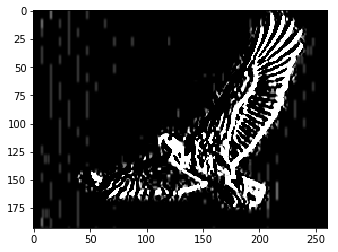

(<matplotlib.image.AxesImage at 0x1d197a2e518>, None)

In [8]:
img = cv.imread('img/eagle.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# 소벨 필터링
fil_ = cv.Sobel(gray, -1, 1, 0, ksize = 5)
plt.imshow(cv.cvtColor(fil_, cv.COLOR_BGR2RGB)),plt.show()

**Laplacian filter**

**cv.Laplacian(이미지, 정밀도, 커널, 배율, 델타)**

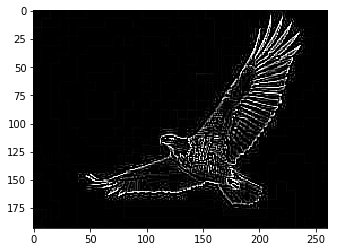

(<matplotlib.image.AxesImage at 0x1d197ecdf28>, None)

In [10]:
img = cv.imread('img/eagle.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# 라플라시안 필터링
fil_ = cv.Laplacian(gray, cv.CV_8U, ksize=3)
plt.imshow(cv.cvtColor(fil_, cv.COLOR_BGR2RGB)),plt.show()

**Canny**

**cv.Canny(이미지,임계값1,임계값2,커널크기,L2 or L1)**

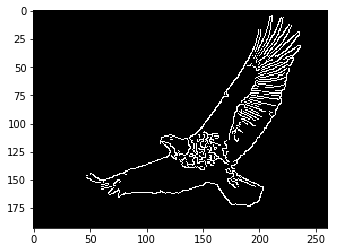

(<matplotlib.image.AxesImage at 0x1d197f30710>, None)

In [11]:
img = cv.imread('img/eagle.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# 라플라시안 필터링
fil_ = cv.Canny(gray,100,255)
plt.imshow(cv.cvtColor(fil_, cv.COLOR_BGR2RGB)),plt.show()

## CONTOUR DETECT

- findCountours / drawContours / convexHull / approxPolyDP
- moments (컨투어 특징추출) / contourArea (컨투어 면적) / arcLength (컨투어 둘레)
- grabCut (오브젝트가 아닌 배경을 추출하는 알고리즘)

**img, contours, hiearchy = cv.findContours(image, mode, method)**

- mode : 컨투어 제공방식 
	* cv2.RETR_EXTERNAL : 가장 바깥쪽 라인만 제공
	* cv2.RETR_LIST : 모든 라인을 계층 없이 제공
	* cv2.RETR_CCOMP:모든 라인을 2계층으로 제공
	* cv2.RETR_TREE : 모든 라인의 모든 계층 정보를 트리 구조로 제공
- method : 근사 값 방식 선택 
	* cv2.CHAIN_APPROX_NONE : 근사 계산하지 않고 모든 좌표 제공
	* cv2.CHAIN_APPROX_SIMPLE : 컨투어 꼭짓점 좌표만 제공
	*  cv2.CHAIN_APPROX_TC89_L1 :The-Chin 알고리즘으로 좌표 개수 축소
	*  cv2.CHAIN_APPROX_TC89_KCOS :The-Chin 알고리즘으로 좌표 개수 축소

**cv.drawContours(img, contours, contour_Idx, color, thickness)**
- contourIdx : 그림 그릴 컨투어 인덱스 ( -1 : 모든 컨투어 표시 ) 
- color : 색상 값 

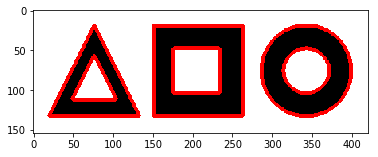

[array([[[334,  19]],

       [[333,  20]],

       [[329,  20]],

       [[328,  21]],

       [[326,  21]],

       [[325,  22]],

       [[323,  22]],

       [[322,  23]],

       [[321,  23]],

       [[320,  24]],

       [[318,  24]],

       [[317,  25]],

       [[316,  25]],

       [[314,  27]],

       [[313,  27]],

       [[311,  29]],

       [[310,  29]],

       [[307,  32]],

       [[306,  32]],

       [[300,  38]],

       [[300,  39]],

       [[297,  42]],

       [[297,  43]],

       [[295,  45]],

       [[295,  46]],

       [[294,  47]],

       [[294,  48]],

       [[293,  49]],

       [[293,  50]],

       [[292,  51]],

       [[292,  52]],

       [[291,  53]],

       [[291,  54]],

       [[290,  55]],

       [[290,  57]],

       [[289,  58]],

       [[289,  60]],

       [[288,  61]],

       [[288,  65]],

       [[287,  66]],

       [[287,  85]],

       [[288,  86]],

       [[288,  90]],

       [[289,  91]],

       [[289,  93]],

       [[

In [102]:
# BGR > GRAY > Binary > findContour > drawContour
img_ = cv.imread('img/contour1.png')
img = cv.cvtColor(img_,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(img,230,255,0)
thresh = cv.bitwise_not(thresh)

contours, hierachy = cv.findContours(thresh, cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)
img_ = cv.drawContours(img_, contours, -1, (0,0,255), 4) # -1 : 모든 외곽

plt.imshow(cv.cvtColor(img_, cv.COLOR_BGR2RGB)),plt.show()

aa = np.array(contours)
print(aa)

- convexHull : 블록의 껍질을 contour

- approxPolyDP : 컨투어의 숫자를 줄이고 실제 컨투어 라인과 근사한 라인을 그릴때 사용